## Wine Quality -  Predict quality using Random forest and make clusters of wine using clustering agorithm K-mean

##### Problem statement:

1)To use of available wine quality dataset and train the model to predict wine quality.

2)To build a clustering of wine datasets based on their content.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,Normalizer,OneHotEncoder,StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from mlxtend.plotting import plot_confusion_matrix
import scipy.cluster.hierarchy as sch

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df_wine = pd.read_csv("https://raw.githubusercontent.com/atulpatelDS/Data_Files/master/wine_quality/winequality.csv")

In [3]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red


Wine dataset contains 6497 rows and 14 columns whose description are as follows

1)fixed acidity : most acids involved with wine are fixed or nonvolatile (do not evaporate readily)

2)volatile acidity:the amount of acetic acid in wine, which at too high levels can lead to an unpleasant, vinegar taste

3)citric acid : found in small quantities, citric acid can add 'freshness' and flavor to wines

4)residual sugar : the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

5)chlorides : the amount of salt in the wine

6)free sulfur dioxide : the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

7)total sulfur dioxide : amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

8)density : the density of water is close to that of water depending on the percent alcohol and sugar content

9)pH : describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

10)sulphates : a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

11)alcohol : the percent alcohol content of the wine

12)quality : output variable (based on sensory data, score between 0 and 10)

13)good : goodness quality of wine (whether good or not)

14)color : colour of the wine (either red or white)


In [4]:
print(type(df_wine))
print(df_wine.shape)

<class 'pandas.core.frame.DataFrame'>
(6497, 14)


In [5]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  good                  6497 non-null   int64  
 13  color                 6497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 710.7+ KB


In [6]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.196552
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.397421
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [7]:
## Find number of wines that classify as Good or bad
df_wine.good.value_counts()

0    5220
1    1277
Name: good, dtype: int64

It seems like our dataset is imbalanced with only around 20 percent of wines that are classified 'good'--1

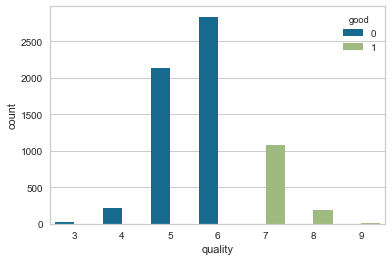

In [8]:
### Lets plot the countplot using column "quality"
sns.countplot(x="quality",data=df_wine,hue="good")

From the above plot we can observer that wines that **have quality 7 or above are categorised as good**. So I think this is not agood approach to keep this column in our ML modelling, lets remove column 'quality' from the dataset.

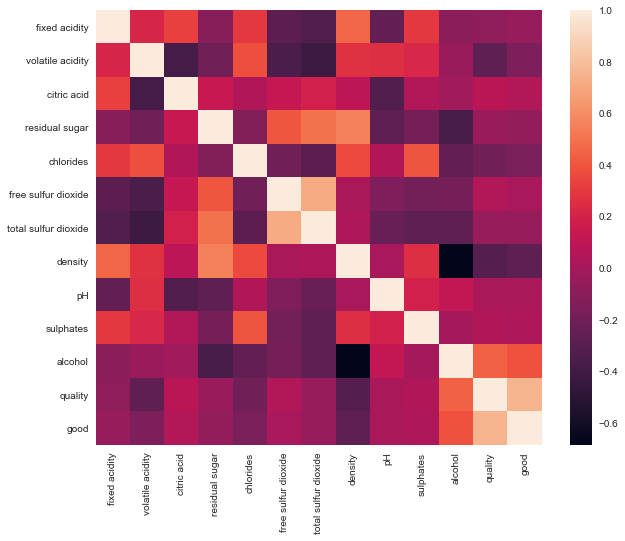

In [9]:
## Lets plot the heatmap to find the correlation between variables.
plt.figure(figsize=(10,8))
sns.heatmap(df_wine.corr())

We can observer that 'quality' column is highly correlated to 'good'column as previously determined by countplot. 
Besides, correlation between 'free sulfur dioxide' and 'total sulfur dioxide' is also high.Thus it is logical to remove one among them to reduce redundancy. Since ,'free sulfur dioxide' is part of the 'total sulfur dioxide' ,lets remove 'free sulfur dioxide'too.

In [10]:
## Remove highly correlated columns "quality" and "free sulfur dioxide"
df_wine.drop(["quality","free sulfur dioxide"],axis=1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,good,color
0,7.4,0.70,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,0,red
1,7.8,0.88,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,0,red
2,7.8,0.76,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,0,red
3,11.2,0.28,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,0,red
4,7.4,0.70,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,0,red
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,92.0,0.99114,3.27,0.50,11.2,0,white
6493,6.6,0.32,0.36,8.0,0.047,168.0,0.99490,3.15,0.46,9.6,0,white
6494,6.5,0.24,0.19,1.2,0.041,111.0,0.99254,2.99,0.46,9.4,0,white
6495,5.5,0.29,0.30,1.1,0.022,110.0,0.98869,3.34,0.38,12.8,1,white


In [11]:
## Check misisng value 
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
good                    0
color                   0
dtype: int64

In [12]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  good                  6497 non-null   int64  
 13  color                 6497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 710.7+ KB


In [13]:
## Apply dummy variable on object columns
### https://www.datacamp.com/community/tutorials/categorical-data
df_wine_dummy =  df_wine.copy()

In [14]:
df_wine_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  good                  6497 non-null   int64  
 13  color                 6497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 710.7+ KB


In [15]:
df_wine_dummy.color.value_counts()

white    4898
red      1599
Name: color, dtype: int64

In [16]:
df_wine_dummy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red


In [17]:
df_wine_dummy["color"].replace("red",0,inplace =True)

In [18]:
df_wine_dummy["color"].replace("white",1,inplace =True)

In [19]:
df_wine_dummy.color.value_counts()

1    4898
0    1599
Name: color, dtype: int64

In [20]:
df_wine_dummy

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,1


In [21]:
df_wine_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  good                  6497 non-null   int64  
 13  color                 6497 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 710.7 KB


In [22]:
y = df_wine_dummy["good"]

In [23]:
### Separate the independent and dependent variables
X = df_wine_dummy.drop("good",axis=1)

In [24]:
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

(6497, 13)
(6497,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [25]:
### split the train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [26]:
print(X_train.shape)
print(y_train.shape)
print(type(X_train))
print(type(y_train))

(4547, 13)
(4547,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [27]:
print(X_test.shape)
print(y_test.shape)
print(type(X_test))
print(type(y_test))

(1950, 13)
(1950,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [28]:
classifier_rf = RandomForestClassifier()

In [29]:
parameter = {"n_estimators": [200,300,400],"max_features": ["auto", "sqrt","log2"],"max_depth" : [4,5,6,7,8],"criterion" :['gini', 'entropy']}

In [30]:
RF_Classifier_GS = GridSearchCV(classifier_rf,param_grid= parameter,cv=5)

In [31]:
RF_Classifier_GS.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [32]:
y_pred = RF_Classifier_GS.predict(X_test)

In [33]:
#### Check Model accuracy and other metrics

rf_acuracy_score = metrics.accuracy_score(y_test,y_pred) 

In [34]:
rf_acuracy_score

1.0

In [35]:
RF_Classifier_GS.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
RF_Classifier_GS.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

In [37]:
RF_Classifier_GS.best_score_

1.0

In [38]:
conf_metrics = metrics.confusion_matrix(y_test,y_pred)
conf_metrics 

array([[1585,    0],
       [   0,  365]], dtype=int64)

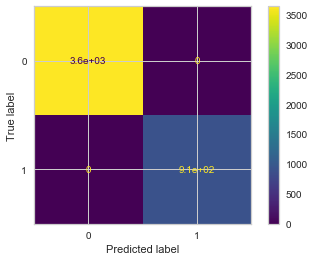

In [39]:
metrics.plot_confusion_matrix(RF_Classifier_GS,X_train,y_train)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1fa70f5b3c8>)

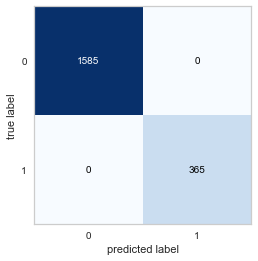

In [40]:
## Otherw ay to visualise the conf metrics
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_mat=conf_metrics)


In [41]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1585
           1       1.00      1.00      1.00       365

    accuracy                           1.00      1950
   macro avg       1.00      1.00      1.00      1950
weighted avg       1.00      1.00      1.00      1950



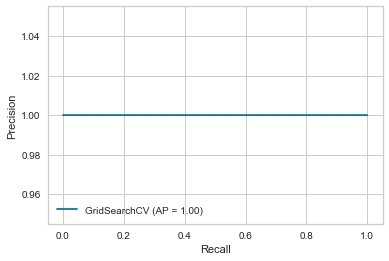

In [42]:
### Plot precesion and Recall curve
metrics.plot_precision_recall_curve(RF_Classifier_GS,X_train,y_train)

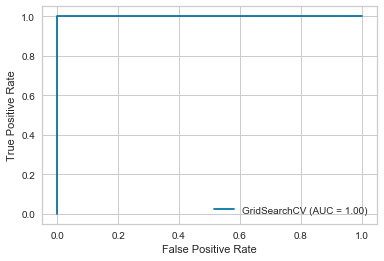

In [43]:
### Plot ROC_AUC 
metrics.plot_roc_curve(RF_Classifier_GS,X_train,y_train)

### Clustering Model--K-Mean-- Unsupervised Learning

In [44]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [45]:
## Lets scale the data
scale = StandardScaler()
X_scale = scale.fit_transform(X)

In [46]:
X_scale.shape

(6497, 13)

In [47]:
y.shape  #### just for cheking This is not required for Clustering

(6497,)

In [48]:
type(X_scale)

numpy.ndarray

In [49]:
col_name =  list(X)

In [50]:
col_name

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'color']

In [51]:
df_X_scale = pd.DataFrame(X_scale,columns=col_name)

In [52]:
df_X_scale.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230,-1.75019
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,-0.937230,-1.75019
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,-0.937230,-1.75019
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,0.207999,-1.75019
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230,-1.75019


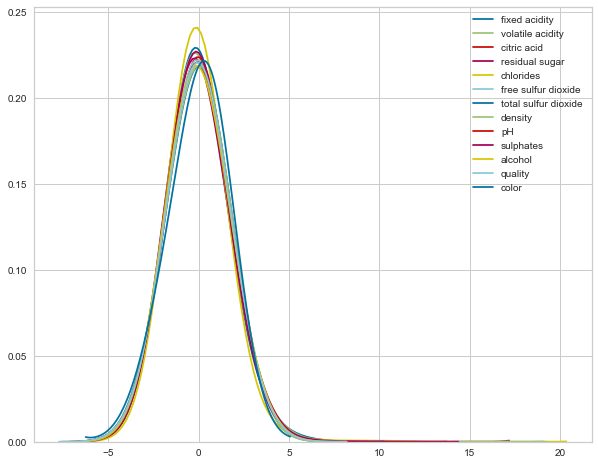

In [53]:
plt.figure(figsize=(10,8))
i = []
for i in col_name:
    sns.kdeplot(df_X_scale[i],bw=1.5)

We can see data is fully scaled

#### Find the cluster
There are a number of methods to choose optimal K such as **Elbow method , GAP Statistics, The Silhouette coefficient**.
But the most common is Elbow method.

**The Elbow method** : To determine the optimal number of clusters, you will need to run the k-means algorithm for different values of k (number of clusters). For each value of k, you will then need to calculate the total within-cluster sum of squares (wss). You can then plot the values of wss on the y-axis and the number of clusters (k) on the x-axis. The optimal number of clusters can be read off the graph at the x-axis.

**The Silhouette coefficient**: To determine the optimal number of clusters, you will need to measure the quality of the clusters that were created. This value determines how closely each data point is to the centroid of its cluster. A high average silhouette coefficient indicates successful clusters. This method checks the silhouette coefficient for different values of k. The optimal number of clusters is, therefore, the maximised silhouette value for the data set.

**The Gap Statistic**: To determine the optimal number of clusters, you will need to know the variation between clusters for different values of k with their expected values of distribution with no clusters.

https://www.dotactiv.com/blog/why-k-means-clustering-is-good-for-business

In [54]:
### Elbow method to find the No of cluster using WSS
wss = []
cluster = list(range(1,11))

for k in cluster:
    kmean = KMeans(n_clusters= k,init="k-means++",random_state = 42)
    kmean.fit(X_scale)
    wss.append(kmean.inertia_)

In [55]:
print("Within Sum of Square :", wss)

Within Sum of Square : [84461.0, 62793.45184677911, 51932.39700636363, 47101.48671044194, 43565.489913061596, 41300.40163839265, 40117.3186817063, 38297.05922014718, 37083.724096011094, 35882.64894684823]


Text(0.5, 0, 'No of Cluster')

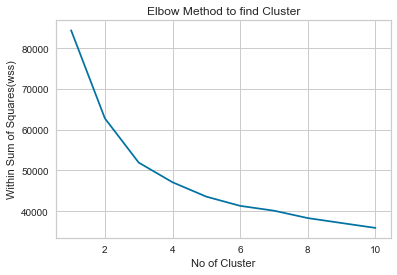

In [56]:
plt.title("Elbow Method to find Cluster")
sns.lineplot(x=cluster,y=wss,data=df_X_scale)
plt.ylabel("Within Sum of Squares(wss)")
plt.xlabel("No of Cluster")

Usually , the number of clusters is decided by observing the elbow plot and where the inertia(wss) seems to level off. However ,we cannot decide on where the inertia seems to level off(can't decide between 2 and 4) in this case to select the value for number of clusters. Thus , we will move on to elbow method by  **'silhouette score'** to identify number of clusters.

In [57]:
### Check the Silhouette score

In [58]:
from sklearn.metrics import silhouette_score

In [59]:
sil_score = []
range_n_clusters = list(range(2,10))
for n_clusters in range_n_clusters:
    kmean = KMeans(n_clusters=n_clusters)
    preds = kmean.fit_predict(df_X_scale)
    centers = kmean.cluster_centers_
    sil_score.append(silhouette_score(df_X_scale, preds))
    print("For n_clusters = {}, silhouette_score is {})".format(n_clusters, sil_score))

For n_clusters = 2, silhouette_score is [0.31699671601823604])
For n_clusters = 3, silhouette_score is [0.31699671601823604, 0.23519496337973395])
For n_clusters = 4, silhouette_score is [0.31699671601823604, 0.23519496337973395, 0.2393390618724827])
For n_clusters = 5, silhouette_score is [0.31699671601823604, 0.23519496337973395, 0.2393390618724827, 0.18716316796168447])
For n_clusters = 6, silhouette_score is [0.31699671601823604, 0.23519496337973395, 0.2393390618724827, 0.18716316796168447, 0.17651962656924894])
For n_clusters = 7, silhouette_score is [0.31699671601823604, 0.23519496337973395, 0.2393390618724827, 0.18716316796168447, 0.17651962656924894, 0.1809641575510454])
For n_clusters = 8, silhouette_score is [0.31699671601823604, 0.23519496337973395, 0.2393390618724827, 0.18716316796168447, 0.17651962656924894, 0.1809641575510454, 0.1593317496057159])
For n_clusters = 9, silhouette_score is [0.31699671601823604, 0.23519496337973395, 0.2393390618724827, 0.18716316796168447, 0.

In [60]:
sil_score

[0.31699671601823604,
 0.23519496337973395,
 0.2393390618724827,
 0.18716316796168447,
 0.17651962656924894,
 0.1809641575510454,
 0.1593317496057159,
 0.1354972723873767]

In [61]:
range_n_clusters

[2, 3, 4, 5, 6, 7, 8, 9]

Text(0.5, 0, 'No of Cluster')

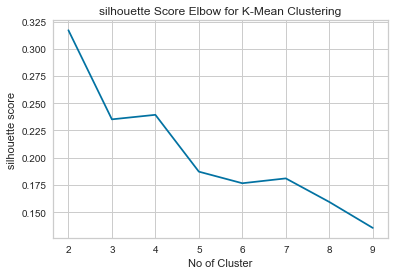

In [62]:
## Plot graph between silhouette score and no of cluster
plt.plot(range_n_clusters,sil_score)
plt.title("silhouette Score Elbow for K-Mean Clustering")
plt.ylabel("silhouette score")
plt.xlabel("No of Cluster")

In [63]:
X = X_scale
y = y
print(X.shape)
print(y.shape)

(6497, 13)
(6497,)


Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.31699671601823604
For n_clusters = 3 The average silhouette_score is : 0.23519496337973395
For n_clusters = 4 The average silhouette_score is : 0.2394472439414478
For n_clusters = 5 The average silhouette_score is : 0.18753950002681744
For n_clusters = 6 The average silhouette_score is : 0.17642877726925096


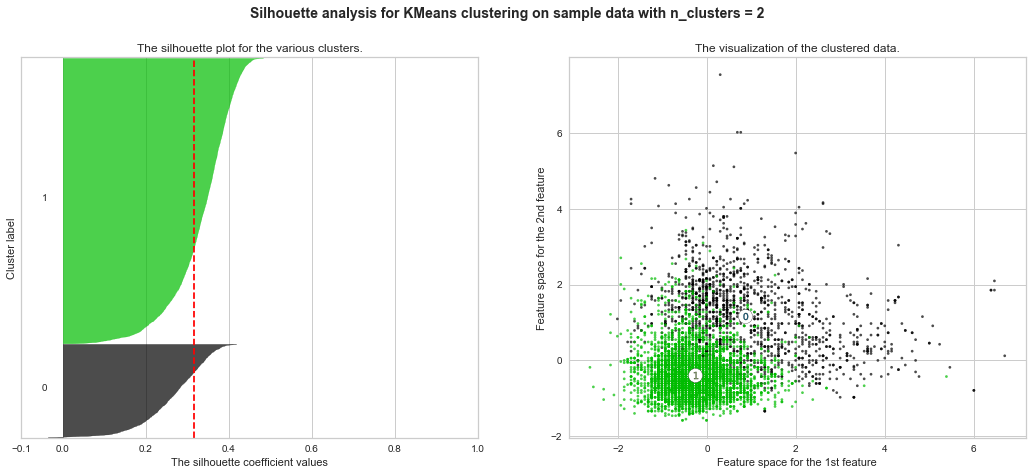

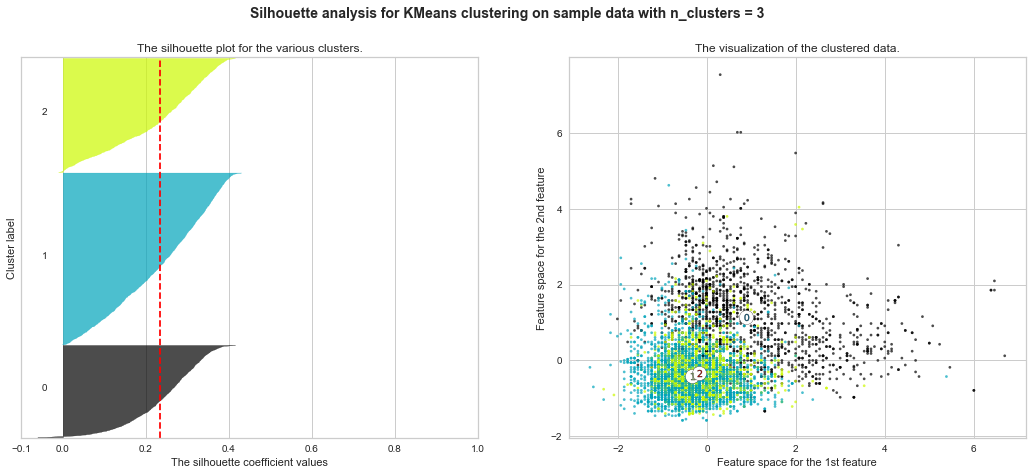

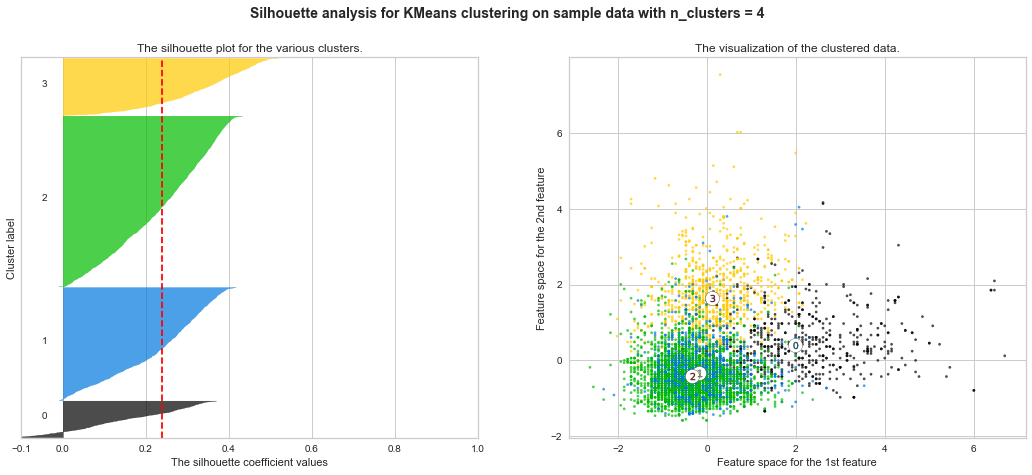

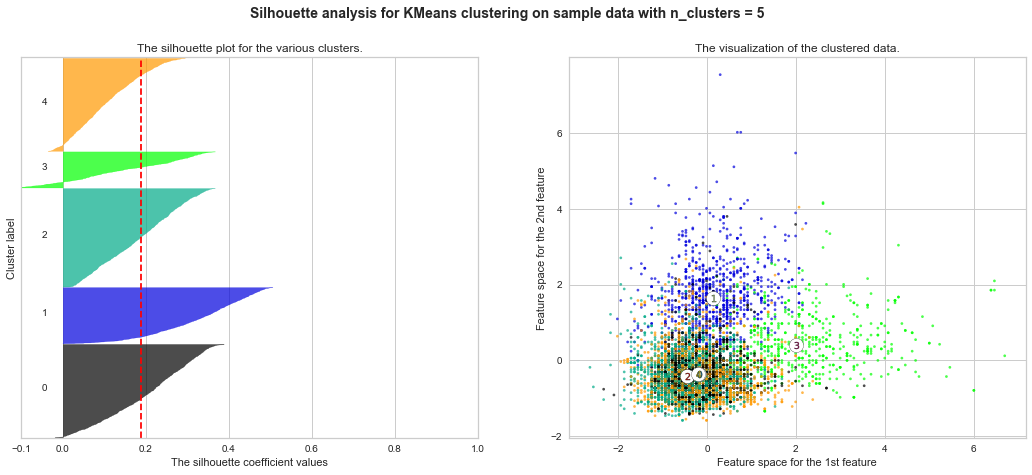

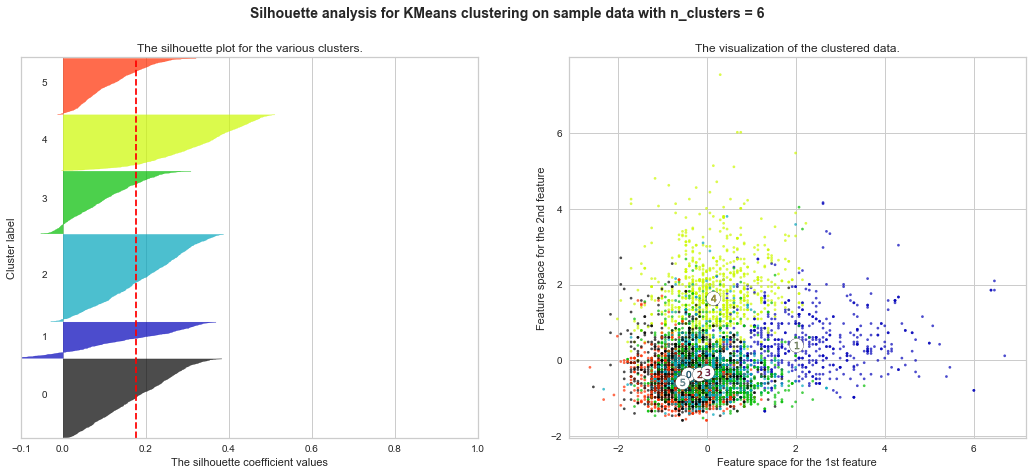

In [64]:
##https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = X_scale
y = y

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

The above graph depicts that the highest silhouette score is obtained when we select number of groupings to be 2.Also 
If we see the custer data distribution we can see there are very minimum overlapping in data between clusters.

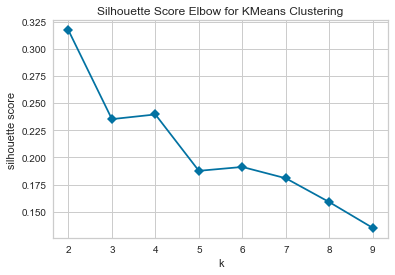

In [65]:
#### Another way to visualise the Silhouette score
from yellowbrick.cluster import KElbowVisualizer
# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False,locate_elbow=False)

# Fit the data and visualize
visualizer.fit(X_scale)    
visualizer.poof()   

C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


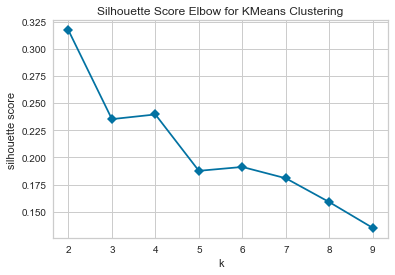

In [66]:
#### Another way to visualise the Silhouette score
from yellowbrick.cluster import KElbowVisualizer
# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False,locate_elbow=True)
# Fit the data and visualize
visualizer.fit(X_scale)    
visualizer.poof()   

locate_elbow=False we used in above graph, here we used locate_elbow=True and see it is showing warning that 
**No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc**

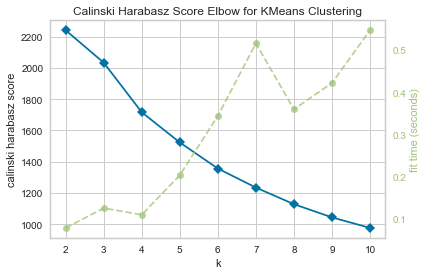

In [67]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state = 0)
visual_sil_score = KElbowVisualizer(model,metric="calinski_harabasz",locate_elbow=False)
visual_sil_score.fit(X_scale)
visual_sil_score.poof()

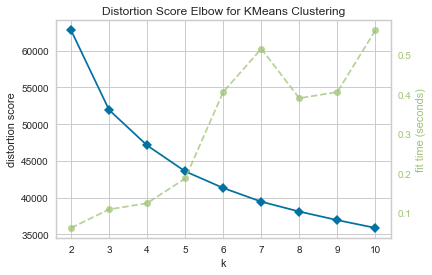

In [68]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state = 0)
visual_sil_score = KElbowVisualizer(model,metric="distortion",locate_elbow=False)
visual_sil_score.fit(X_scale)
visual_sil_score.poof()

####  from the above explainations and graphs Now we choose k = 2 cluster to build our Model

In [69]:
### Now using Kmean for building our Model
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0)

In [70]:
y_pred_k2 = kmeans.fit_predict(X_scale)

In [71]:
print(y_pred_k2.shape)
print(type(y_pred_k2))

(6497,)
<class 'numpy.ndarray'>


In [72]:
#### As we actually have the level data so lets chek the accuracy
print(y.shape)
print(type(y))

(6497,)
<class 'pandas.core.series.Series'>


In [73]:
print("Accuracy of KMean Cluster_Model(k=2) :",metrics.accuracy_score(y,y_pred_k2))

Accuracy of KMean Cluster_Model(k=2) : 0.6225950438663999


In [74]:
print(metrics.classification_report(y,y_pred_k2))

              precision    recall  f1-score   support

           0       0.78      0.73      0.76      5220
           1       0.13      0.17      0.15      1277

    accuracy                           0.62      6497
   macro avg       0.46      0.45      0.45      6497
weighted avg       0.65      0.62      0.64      6497



In [75]:
conf_met_k2 = metrics.confusion_matrix(y,y_pred_k2)
conf_met_k2

array([[3832, 1388],
       [1064,  213]], dtype=int64)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1fa00172548>)

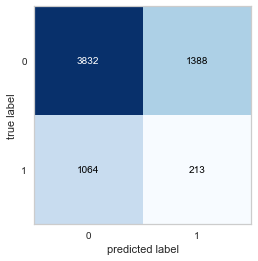

In [76]:
## Plot the confusion metrics
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_met_k2)

In [77]:
### https://www.researchgate.net/publication/271386915_The_Area_under_the_ROC_Curve_as_a_Criterion_for_Clustering_Evaluation

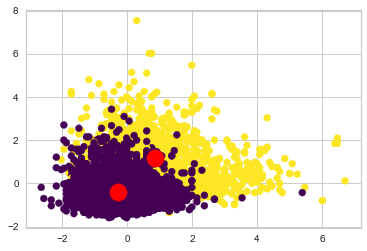

1.4096167962602633

In [78]:
plt.scatter(X_scale[:,0],X_scale[:,1],c=y_pred_k2,cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()
#calculating davies bouldin score
metrics.davies_bouldin_score(X_scale,y_pred_k2)

The Davies–Bouldin index (DBI) (introduced by David L. Davies and Donald W. Bouldin in 1979) is a metric for evaluating clustering algorithms. This is an internal evaluation scheme, where the validation of how well the clustering has been done is made using quantities and features inherent to the dataset.

In [79]:
df_wine_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  good                  6497 non-null   int64  
 13  color                 6497 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 710.7 KB


In [80]:
# Assign Cluster to original data
df_kmeans=df_wine_dummy.copy()
df_kmeans['cluster']= y_pred_k2
#x_kmeans.groupby('labels').mean()

In [81]:
df_kmeans.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color,cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,0,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0,1


In [82]:
print(df_kmeans.shape)
print(type(df_kmeans))

(6497, 15)
<class 'pandas.core.frame.DataFrame'>


In [83]:
col_df_kmean = list(df_kmeans)
col_df_kmean.remove("cluster")

In [84]:
col_df_kmean

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'good',
 'color']

In [85]:
df_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  good                  6497 non-null   int64  
 13  color                 6497 non-null   int64  
 14  cluster               6497 non-null   int32  
dtypes: float64(11), int32

In [86]:
## Create cluster Profile
#cluster_profile_kmean = pd.pivot_table(df_kmeans,index="cluster",columns=col_df_kmean,aggfunc="mean") 
df_kmeans.groupby("cluster").size()

cluster
0    4896
1    1601
dtype: int64

In [87]:
cluster_profile_kmean = pd.pivot_table(df_kmeans,index="cluster",values=col_df_kmean,aggfunc="mean") 

In [88]:
cluster_profile_kmean

,alcohol,chlorides,citric acid,color,density,fixed acidity,free sulfur dioxide,good,pH,quality,residual sugar,sulphates,total sulfur dioxide,volatile acidity
cluster,,,,,,,,,,,,,,
0,10.518011,0.045560,0.334383,0.997345,0.994010,6.851420,35.359579,0.217320,3.188362,5.883170,6.380300,0.489481,138.379391,0.276902
1,10.411649,0.088065,0.270468,0.009369,0.996796,8.328107,15.741724,0.133042,3.310668,5.620237,2.577608,0.659057,46.525297,0.531605


###  Hierarchical clustering :  Agglomerative Clustering

we have dendrogram plot to identify number of clusters in hierarchical clustering.A dendrogram is a diagram that shows the hierarchical relationship between objects. It is most commonly created as an output from hierarchical clustering. The main use of a dendrogram is to work out the best way to allocate objects to clusters. 

In [89]:
## Perform hierarchical/agglomerative clustering.
agg = sch.linkage(X_scale,'ward')

In [90]:
print(type(agg))

<class 'numpy.ndarray'>


In [91]:
print(agg.shape)

(6496, 4)


In [92]:
agg[0:4]

array([[  0.,   4.,   0.,   2.],
       [135., 140.,   0.,   2.],
       [757., 758.,   0.,   2.],
       [136., 141.,   0.,   2.]])

Text(0.5, 0, 'Cluster')

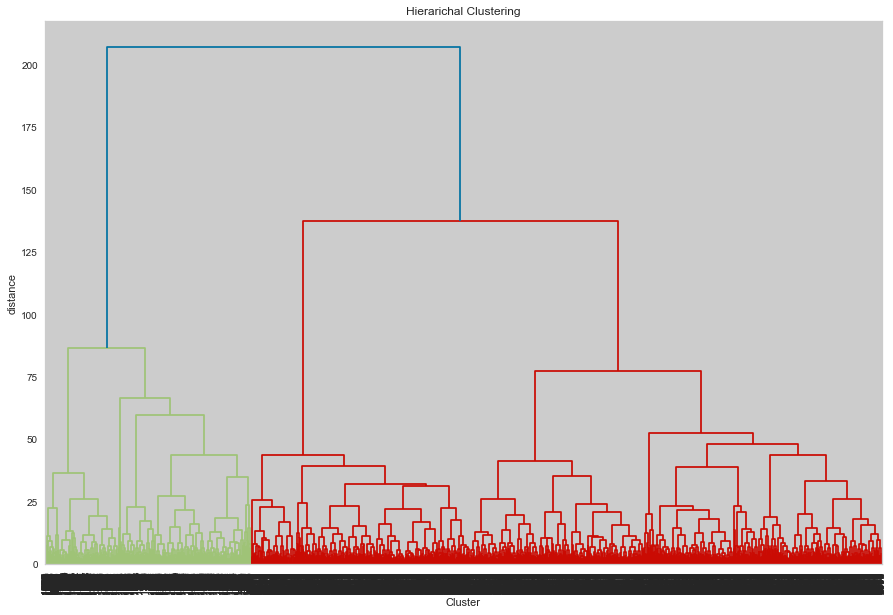

In [93]:
### Plot the Hierarchical Plotting
plt.figure(figsize=(15,10))
dendoram = sch.dendrogram(agg,leaf_font_size=10,leaf_rotation=90)
plt.title("Hierarichal Clustering")
plt.ylabel("distance")
plt.xlabel("Cluster")

The key to interpreting a dendrogram is to focus on the height at which any two objects are joined together which indicates the order in which the clusters were joined.From the dendrogram plot above, it can be inferred that number of clusters can be selected as 2.

In [94]:
## Applying Agglomerative Clustering 
agg_clust = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
agg_clust.fit(X_scale)
cluster_labels = agg_clust.labels_

In [95]:
print(type(cluster_labels))
print(cluster_labels.shape)

<class 'numpy.ndarray'>
(6497,)


In [96]:
cluster = pd.value_counts(cluster_labels)
cluster

0    4892
1    1605
dtype: int64

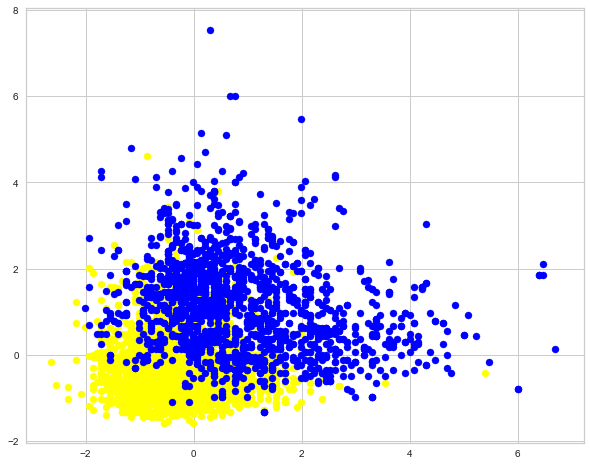

In [97]:
#plotting clusters on scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(X_scale[cluster_labels==0,0],X_scale[cluster_labels==0,1],s=50, marker='o', color='yellow')
plt.scatter(X_scale[cluster_labels==1,0],X_scale[cluster_labels==1,1],s=50, marker='o', color='blue')


In [98]:
metrics.davies_bouldin_score(X_scale,cluster_labels)

1.4168262781506495

In [99]:
cluster_profile_hierarchical = pd.pivot_table(df_kmeans,index="cluster",values=col_df_kmean,aggfunc="mean") 

In [100]:
#Assign Cluster to original data
df_hierarchical=df_wine_dummy.copy()
df_hierarchical['cluster']= cluster_labels

In [101]:
col_df_kmean

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'good',
 'color']

In [102]:
df_hierarchical.groupby("cluster").size()

cluster
0    4892
1    1605
dtype: int64

In [103]:
cluster_profile_hierarchical = pd.pivot_table(df_hierarchical,index="cluster",values=col_df_kmean,aggfunc="mean") 
cluster_profile_hierarchical

,alcohol,chlorides,citric acid,color,density,fixed acidity,free sulfur dioxide,good,pH,quality,residual sugar,sulphates,total sulfur dioxide,volatile acidity
cluster,,,,,,,,,,,,,,
0,10.508632,0.045809,0.334949,0.997547,0.994033,6.856040,35.354354,0.214841,3.187825,5.877146,6.399213,0.488892,138.398508,0.277143
1,10.440498,0.087199,0.268903,0.011215,0.996719,8.310343,15.806542,0.140810,3.312000,5.639252,2.529439,0.660430,46.695950,0.530234


In [104]:
cluster_profile_kmean

,alcohol,chlorides,citric acid,color,density,fixed acidity,free sulfur dioxide,good,pH,quality,residual sugar,sulphates,total sulfur dioxide,volatile acidity
cluster,,,,,,,,,,,,,,
0,10.518011,0.045560,0.334383,0.997345,0.994010,6.851420,35.359579,0.217320,3.188362,5.883170,6.380300,0.489481,138.379391,0.276902
1,10.411649,0.088065,0.270468,0.009369,0.996796,8.328107,15.741724,0.133042,3.310668,5.620237,2.577608,0.659057,46.525297,0.531605


We can se from the above both tables that result of clustering is almost same we got from K-Mean and Hierarchical